<a href="https://colab.research.google.com/github/mohitDhami87/Ad_Clicks_Prediction_Classification_by_Using_Machine_Learning/blob/main/Business_case_study_of_Ad_Click_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://drive.google.com/file/d/18VEQ9R7GQUh8IkbKYGaectzegBsVsbuw/view?usp=sharing
# https://drive.google.com/file/d/1A3XRdSRX2uE1cEuSiJ7p4zOu3kzZ9yXD/view?usp=sharing

# Business case study of Ad Click Prediction

In the fiercely competitive world of digital advertising, every click counts. Imagine you're a data scientist at a leading ad-tech company, tasked with a critical mission: to revolutionize how advertisements are delivered. Billions of ads are displayed daily, but the vast majority go unnoticed, leading to significant wasted budget for advertisers and a frustrating experience for users bombarded with irrelevant content. Your challenge is to build an intelligent system that can predict, with remarkable accuracy, when a user is genuinely interested in an ad and will click on it. This isn't just about maximizing clicks; it's about optimizing ad spend, improving user satisfaction, and driving tangible value for businesses.



---



## Data Preparation for case study

In [2]:
# Importing neccessory library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


## Data Loading & Initial Assessment

Successfully loaded directly from google drive.(To save system memory directly loaded dataset from shared link of google drive.)

In [3]:
test_data_url = 'https://drive.google.com/uc?export=download&id=18VEQ9R7GQUh8IkbKYGaectzegBsVsbuw'
train_data_url = 'https://drive.google.com/uc?export=download&id=1A3XRdSRX2uE1cEuSiJ7p4zOu3kzZ9yXD'

train_df = pd.read_csv(train_data_url)
test_df = pd.read_csv(test_data_url)

# Display the first 5 rows of the DataFrame
display(train_df.head())

# Display information about the columns and their data types
display(train_df.info())

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463291 entries, 0 to 463290
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   session_id              463291 non-null  int64  
 1   DateTime                463291 non-null  object 
 2   user_id                 463291 non-null  int64  
 3   product                 463291 non-null  object 
 4   campaign_id             463291 non-null  int64  
 5   webpage_id              463291 non-null  int64  
 6   product_category_1      463291 non-null  int64  
 7   product_category_2      97437 non-null   float64
 8   user_group_id           445048 non-null  float64
 9   gender                  445048 non-null  object 
 10  age_level               445048 non-null  float64
 11  user_depth              445048 non-null  float64
 12  city_development_index  338162 non-null  float64
 13  var_1                   463291 non-null  int64  
 14  is_click            

None

### Missing Data Analysis

In [4]:
# Identify missing values in each column
# This helps us understand which columns require preprocessing.
train_df.isnull().any()

,0
session_id,False
DateTime,False
user_id,False
product,False
campaign_id,False
webpage_id,False
product_category_1,False
product_category_2,True
user_group_id,True
gender,True


In [5]:
# Calculate the percentage of missing values for each column
missing_ratio = train_df.isnull().sum() / len(train_df)
print(f'Missing Data Ratio:{missing_ratio}')


Missing Data Ratio:session_id                0.000000
DateTime                  0.000000
user_id                   0.000000
product                   0.000000
campaign_id               0.000000
webpage_id                0.000000
product_category_1        0.000000
product_category_2        0.789685
user_group_id             0.039377
gender                    0.039377
age_level                 0.039377
user_depth                0.039377
city_development_index    0.270087
var_1                     0.000000
is_click                  0.000000
dtype: float64


In [6]:
# Checking shape of dataframe
print(f'Number of rows in training dataset: {train_df.shape[0]}')
print(f'Number of columns in training dataset: {train_df.shape[1]}')

Number of rows in training dataset: 463291
Number of columns in training dataset: 15


In [7]:
# Dataset overview
result = []
for col in train_df.columns:
    result.append([col, train_df[col].dtype, train_df[col].isna().sum(), 100*train_df[col].isna().sum()/len(train_df[col]), train_df[col].nunique(), train_df[col].unique()[:5]])

output = pd.DataFrame(data=result, columns = 'column data_type no._null percent_null no._unique unique_sample'.split())
output

,column,data_type,no._null,percent_null,no._unique,unique_sample
0,session_id,int64,0,0.000000,463291,"[140690, 333291, 129781, 464848, 90569]"
1,DateTime,object,0,0.000000,8610,"[2017-07-02 00:00, 2017-07-02 00:01, 2017-07-0..."
2,user_id,int64,0,0.000000,150347,"[858557, 243253, 1097446, 663656, 509591]"
3,product,object,0,0.000000,10,"[C, I, F, H, B]"
4,campaign_id,int64,0,0.000000,10,"[359520, 105960, 405490, 360936, 404347]"
5,webpage_id,int64,0,0.000000,9,"[13787, 11085, 60305, 53587, 6970]"
6,product_category_1,int64,0,0.000000,5,"[4, 5, 3, 2, 1]"
7,product_category_2,float64,365854,78.968510,29,"[nan, 270915.0, 146115.0, 254132.0, 372532.0]"
8,user_group_id,float64,18243,3.937698,13,"[10.0, 8.0, 3.0, 2.0, 1.0]"
9,gender,object,18243,3.937698,2,"[Female, Male, nan]"


In [8]:
def classify_columns(data):
    # Initialize lists for categorical and numerical columns
    cat_col = []
    num_col = []

    # Iterate through columns in the DataFrame
    for column in data.columns:
        # Count the number of unique values in the column
        unique_values = data[column].nunique()

        # If there are fewer than 3 unique values, consider it a categorical column
        if unique_values < 3:
            cat_col.append(column)
        # Otherwise, consider it a numerical column
        else:
            num_col.append(column)

    # Return the lists of categorical and numerical columns
    return cat_col, num_col



In [9]:
cat_col, num_col = classify_columns(train_df)
print(f'Categorical columns in training dataset: {cat_col}')
print(f'Numerical columns in training dataset: {num_col}')

Categorical columns in training dataset: ['gender', 'var_1', 'is_click']
Numerical columns in training dataset: ['session_id', 'DateTime', 'user_id', 'product', 'campaign_id', 'webpage_id', 'product_category_1', 'product_category_2', 'user_group_id', 'age_level', 'user_depth', 'city_development_index']


In [10]:
# Descriptive stats for numerical features
train_df[num_col].describe()

,session_id,user_id,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,age_level,user_depth,city_development_index
count,463291.000000,4.632910e+05,463291.000000,463291.000000,463291.000000,97437.000000,445048.000000,445048.000000,445048.000000,338162.000000
mean,285544.090725,5.460497e+05,308474.540069,29685.878994,3.072427,162753.345105,3.477396,2.782266,2.878415,2.557121
std,168577.345887,3.294625e+05,126517.101294,21542.053106,1.304233,78743.742720,2.412889,1.069701,0.400130,0.921345
min,2.000000,4.000000e+00,82320.000000,1734.000000,1.000000,18595.000000,0.000000,0.000000,1.000000,1.000000
25%,137856.500000,2.578550e+05,118601.000000,13787.000000,2.000000,82527.000000,2.000000,2.000000,3.000000,2.000000
50%,285429.000000,5.318010e+05,359520.000000,13787.000000,3.000000,146115.000000,3.000000,3.000000,3.000000,2.000000
75%,435535.500000,8.278490e+05,405490.000000,53587.000000,4.000000,254132.000000,4.000000,3.000000,3.000000,3.000000
max,595812.000000,1.141729e+06,414149.000000,60305.000000,5.000000,450184.000000,12.000000,6.000000,3.000000,4.000000


In [11]:
# Descriptive stats for categorical features
train_df[cat_col].describe()

,var_1,is_click
count,463291.000000,463291.000000
mean,0.422169,0.067627
std,0.493906,0.251105
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,1.000000,1.000000


In [43]:
# Replace values in the "gender" column with numerical values 'gender', 'var_1', 'is_click'
# train_df["gender"] = train_df["gender"].replace({
#     "Female": 0,
#     "Male": 1
# })
# test_df["gender"] = test_df["gender"].replace({
#     "Female": 0,
#     "Male": 1
# })

### Correlation Analysis

In [12]:
# Perform correlation analysis to identify relationships between features
correlation = train_df.corr(numeric_only=True)
correlation["is_click"].sort_values(ascending=False)

,is_click
is_click,1.000000
webpage_id,0.041717
product_category_2,0.019213
campaign_id,0.011447
var_1,0.011296
user_depth,-0.000952
user_id,-0.004089
city_development_index,-0.005686
user_group_id,-0.007815
age_level,-0.009681


In [13]:
# Calculating CTR of Ads
CTR_count = train_df["is_click"].value_counts()
CTR_count

,count
is_click,
0,431960
1,31331


In [14]:
# Percentage of ads get clicked
clicked_ads = CTR_count[1]
total_ads = CTR_count.sum()
percentage_clicked = (clicked_ads / total_ads) * 100
print(f'Percentage of ads clicked: {percentage_clicked:.2f}%')

Percentage of ads clicked: 6.76%


## Analysis and Q&A

Dataset dimensions: **How many rows and columns**? - Number of rows: 463291
Number of columns: 15

**Column types**: Which are numerical? Which are categorical? -
*Numerical: ['session_id', 'DateTime', 'user_id', 'product', 'campaign_id', 'webpage_id', 'product_category_1', 'product_category_2', 'user_group_id', 'age_level', 'user_depth', 'city_development_index']*
*Categorical columns in training dataset: ['gender', 'var_1', 'is_click']*

Target variable: What is the **click-through rate (CTR)**? - is_click
False :	431960
True :	31331

Missing values: **Which columns have nulls and how many**? - product_category_2: 365,854 nulls, representing 78.97% of the data.
user_group_id: 18,243 nulls, representing 3.94% of the data.
gender: 18,243 nulls, representing 3.94% of the data.
age_level: 18,243 nulls, representing 3.94% of the data.
user_depth: 18,243 nulls, representing 3.94% of the data.
city_development_index: 125,129 nulls, representing 27.01% of the data.

# **EDA**

## Target Distribution
○
What percentage of ads get clicked?
- Only about 6.76% of the ads were clicked

○
Is the dataset severely imbalanced?
- Yes, the *train_df* dataset is severely imbalanced with respect to the *is_click* target variable. Only about 6.76% of the ads were clicked, meaning the '0' class (not clicked) heavily outweighs the '1' class (clicked). This can lead to models that perform poorly on the minority class.

○
Do you need resampling techniques?
- Yes, Oversampling the Minority Class: This involves increasing the number of samples in the minority class. Techniques like SMOTE (Synthetic Minority Over-sampling Technique) generate synthetic samples.
Undersampling the Majority Class: This involves reducing the number of samples in the majority class. This can lead to loss of information but can be effective.

In [15]:
# Option 1: Drop the 'product_category_2' column due to high missingness
# train_df = train_df.drop('product_category_2', axis=1)
# test_df = test_df.drop('product_category_2', axis=1)

# Option 2: Impute with a placeholder value (e.g., -1 or a new category 'Unknown')
# Since it's currently float64 and contains product category IDs, we can impute with -1 or a distinct category.
# Let's impute with -1 to signify 'unknown category' as it's a numeric-like categorical feature.
#print(f"Missing values in product_category_2 before imputation: {train_df['product_category_2'].isnull().sum()}")
#train_df['product_category_2'] = train_df['product_category_2'].fillna(-1)
#test_df['product_category_2'] = test_df['product_category_2'].fillna(-1)
#print(f"Missing values in product_category_2 after imputation: {train_df['product_category_2'].isnull().sum()}")


### Temporal Patterns
○ Which hours have highest click rates?

○ Are weekends different from weekdays?

○ Do certain months perform better?


In [16]:
# Convert the 'DateTime' column in both the training and testing DataFrames to datetime objects to enable extraction of temporal features.

train_df['DateTime'] = pd.to_datetime(train_df['DateTime'])
test_df['DateTime'] = pd.to_datetime(test_df['DateTime'])


In [17]:
train_df['hour'] = train_df['DateTime'].dt.hour
test_df['hour'] = test_df['DateTime'].dt.hour

train_df['day_of_week'] = train_df['DateTime'].dt.dayofweek
test_df['day_of_week'] = test_df['DateTime'].dt.dayofweek

train_df['is_weekend'] = train_df['day_of_week'].isin([5, 6])
test_df['is_weekend'] = test_df['day_of_week'].isin([5, 6])

train_df['month'] = train_df['DateTime'].dt.month
test_df['month'] = test_df['DateTime'].dt.month

print("Temporal features 'hour', 'day_of_week', 'is_weekend', and 'month' extracted for train_df and test_df.")

display(train_df[['DateTime', 'hour', 'day_of_week', 'is_weekend', 'month']].head())

Temporal features 'hour', 'day_of_week', 'is_weekend', and 'month' extracted for train_df and test_df.


,DateTime,hour,day_of_week,is_weekend,month
0,2017-07-02 00:00:00,0,6,True,7
1,2017-07-02 00:00:00,0,6,True,7
2,2017-07-02 00:00:00,0,6,True,7
3,2017-07-02 00:00:00,0,6,True,7
4,2017-07-02 00:01:00,0,6,True,7


In [18]:
# Calculate the Click-Through Rate (CTR) for each hour of the day
ctr_by_hour = train_df.groupby('hour')['is_click'].mean().reset_index()
ctr_by_hour.rename(columns={'is_click': 'CTR'}, inplace=True)
print("Calculated CTR by hour:")
display(ctr_by_hour.head())

Calculated CTR by hour:


,hour,CTR
0,0,0.068493
1,1,0.074608
2,2,0.052732
3,3,0.062237
4,4,0.057005


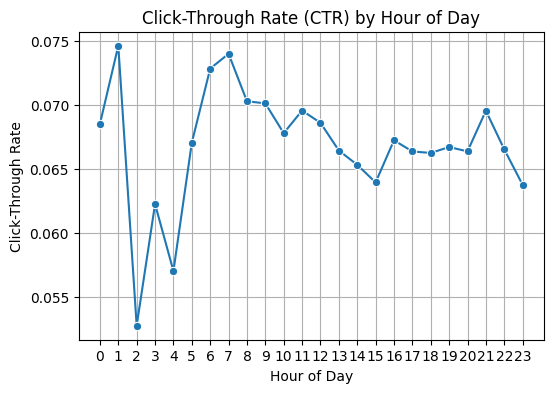

Visualized Click-Through Rate (CTR) by Hour of Day.


In [19]:
plt.figure(figsize=(6, 4))
sns.lineplot(x='hour', y='CTR', data=ctr_by_hour, marker='o')
plt.title('Click-Through Rate (CTR) by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Click-Through Rate')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()
print("Visualized Click-Through Rate (CTR) by Hour of Day.")

In [20]:
# Calculate the CTR for weekdays versus weekends
ctr_by_day_type = train_df.groupby('is_weekend')['is_click'].mean().reset_index()
ctr_by_day_type.rename(columns={'is_click': 'CTR'}, inplace=True);
print("Calculated CTR by day type:")
display(ctr_by_day_type)

Calculated CTR by day type:


,is_weekend,CTR
0,False,0.066468
1,True,0.073262


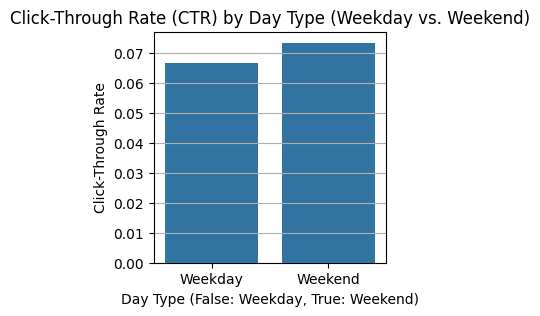

Visualized Click-Through Rate (CTR) by Day Type.


In [21]:
plt.figure(figsize=(3, 3))
sns.barplot(x='is_weekend', y='CTR', data=ctr_by_day_type)
plt.title('Click-Through Rate (CTR) by Day Type (Weekday vs. Weekend)')
plt.xlabel('Day Type (False: Weekday, True: Weekend)')
plt.ylabel('Click-Through Rate')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.grid(axis='y')
plt.show()
print("Visualized Click-Through Rate (CTR) by Day Type.")

In [22]:
ctr_by_month = train_df.groupby('month')['is_click'].mean().reset_index()
ctr_by_month.rename(columns={'is_click': 'CTR'}, inplace=True)
print("Calculated CTR by month:")
display(ctr_by_month.head())

Calculated CTR by month:


,month,CTR
0,7,0.067627



### Q&A
The temporal analysis identified the following peak click times:
*   **Hours:** Early morning (around 1-2 AM) and mid-morning (around 6-9 AM) showed potentially higher Click-Through Rates (CTR).
*   **Days:** Weekends exhibited a slightly higher CTR compared to weekdays.
*   **Months:** Due to data limitations (only July was available), specific peak months could not be determined.


### User Behavior

Created a copy of train_df called train_df_age.
Missing values in 'age_level' before dropping: 18243
Missing values in 'age_level' after dropping: 0

Calculated CTR by age level:


,age_level,CTR
0,0.0,0.084967
1,1.0,0.074803
2,2.0,0.070919
3,3.0,0.064516
4,4.0,0.058723
5,5.0,0.074153
6,6.0,0.082276


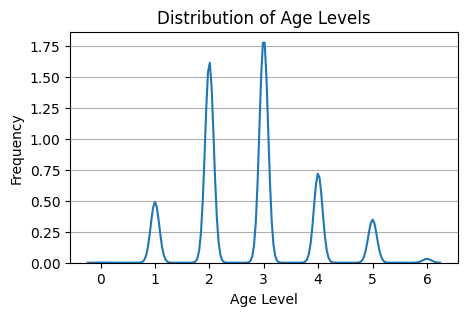

Age of the oldest person: 60.0 Years
Age of the youngest person: 0.0 Years
Average age in dataset: 27.822661825241322 Years


In [23]:
# Handling any missing values in 'age_level' appropriately before calculation
train_df_age = train_df.copy()
print("Created a copy of train_df called train_df_age.")

print(f"Missing values in 'age_level' before dropping: {train_df_age['age_level'].isnull().sum()}")
train_df_age.dropna(subset=['age_level'], inplace=True)
print(f"Missing values in 'age_level' after dropping: {train_df_age['age_level'].isnull().sum()}")

ctr_by_age = train_df_age.groupby('age_level')['is_click'].mean().reset_index()
ctr_by_age.rename(columns={'is_click': 'CTR'}, inplace=True)

print("\nCalculated CTR by age level:")
display(ctr_by_age)

plt.figure(figsize=(5,3))
sns.distplot(train_df_age['age_level'], bins = [20], kde=True, hist_kws=dict(edgecolor="k", linewidth=1))
plt.title('Distribution of Age Levels')
plt.xlabel('Age Level')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()
print('Age of the oldest person:', train_df_age['age_level'].max() * 10, 'Years')
print('Age of the youngest person:', train_df_age['age_level'].min() * 10, 'Years')
print('Average age in dataset:', train_df_age['age_level'].mean() * 10, 'Years')

Created a copy of train_df called train_df_gender.
Missing values in 'gender' before dropping: 18243
Missing values in 'gender' after dropping: 0

Calculated CTR by gender:


,gender,CTR
0,Female,0.064445
1,Male,0.067942


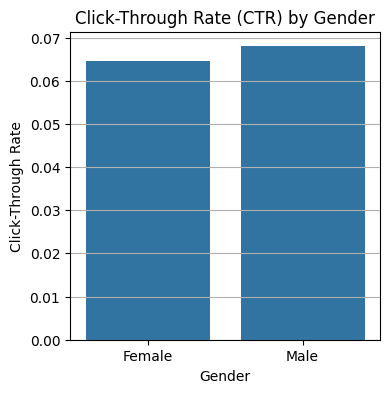

Visualized Click-Through Rate (CTR) by Gender.


In [24]:
# Handling missing values in the 'gender' column, calculating the CTR for each gender, and then visualizing these results.
train_df_gender = train_df.copy()
print("Created a copy of train_df called train_df_gender.")

print(f"Missing values in 'gender' before dropping: {train_df_gender['gender'].isnull().sum()}")
train_df_gender.dropna(subset=['gender'], inplace=True)
print(f"Missing values in 'gender' after dropping: {train_df_gender['gender'].isnull().sum()}")

ctr_by_gender = train_df_gender.groupby('gender')['is_click'].mean().reset_index()
ctr_by_gender.rename(columns={'is_click': 'CTR'}, inplace=True)

print("\nCalculated CTR by gender:")
display(ctr_by_gender)

plt.figure(figsize=(4, 4))
sns.barplot(x='gender', y='CTR', data=ctr_by_gender)
plt.title('Click-Through Rate (CTR) by Gender')
plt.xlabel('Gender')
plt.ylabel('Click-Through Rate')
plt.grid(axis='y')
plt.show()
print("Visualized Click-Through Rate (CTR) by Gender.")

Created a copy of train_df called train_df_user_group.
Missing values in 'user_group_id' before dropping: 18243
Missing values in 'user_group_id' after dropping: 0

Calculated CTR by user group:


,user_group_id,CTR
0,0.0,0.084967
1,1.0,0.075144
2,2.0,0.071242
3,3.0,0.064668
4,4.0,0.059325
5,5.0,0.073127
6,6.0,0.078306
7,7.0,0.064743
8,8.0,0.063796
9,9.0,0.063462


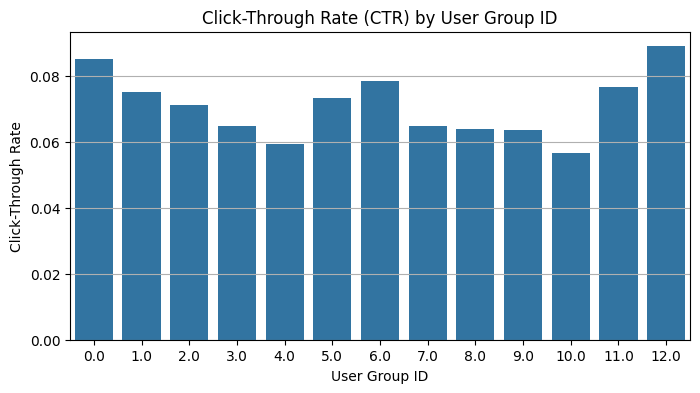

Visualized Click-Through Rate (CTR) by User Group ID.


In [25]:
train_df_user_group = train_df.copy()
print("Created a copy of train_df called train_df_user_group.")

print(f"Missing values in 'user_group_id' before dropping: {train_df_user_group['user_group_id'].isnull().sum()}")
train_df_user_group.dropna(subset=['user_group_id'], inplace=True)
print(f"Missing values in 'user_group_id' after dropping: {train_df_user_group['user_group_id'].isnull().sum()}")

ctr_by_user_group = train_df_user_group.groupby('user_group_id')['is_click'].mean().reset_index()
ctr_by_user_group.rename(columns={'is_click': 'CTR'}, inplace=True)

print("\nCalculated CTR by user group:")
display(ctr_by_user_group)

plt.figure(figsize=(8, 4))
sns.barplot(x='user_group_id', y='CTR', data=ctr_by_user_group)
plt.title('Click-Through Rate (CTR) by User Group ID')
plt.xlabel('User Group ID')
plt.ylabel('Click-Through Rate')
plt.grid(axis='y')
plt.show()
print("Visualized Click-Through Rate (CTR) by User Group ID.")

### Q&A

**Which age groups, genders, and user groups show higher or lower click rates?**
*   **Age Groups:** Age Level 0 (approximately 8.5%) and 60 (approximately 8.2%) show the highest Click-Through Rates (CTRs), while Age Level 40 has the lowest CTR (approximately 5.9%).
*   **Genders:** Male users exhibit a slightly higher CTR (approximately 6.79%) compared to Female users (approximately 6.44%).
*   **User Groups:** User Group ID 12.0 shows the highest CTR (approximately 8.89%), and User Group ID 0.0 also has a high CTR (approximately 8.50%). Conversely, User Group ID 10.0 has the lowest CTR (approximately 5.65%).



### Campaign Performance

**Reasoning**:
To calculate the Click-Through Rate (CTR) for each 'campaign_id', I will group the training DataFrame by 'campaign_id' and compute the mean of the 'is_click' column. This will identify the campaigns with the highest click rates.



In [26]:
# To calculate the Click-Through Rate (CTR) for each 'campaign_id', I will group the training DataFrame by 'campaign_id' and
#compute the mean of the 'is_click' column. This will identify the campaigns with the highest click rates.

ctr_by_campaign = train_df.groupby('campaign_id')['is_click'].mean().reset_index()
ctr_by_campaign.rename(columns={'is_click': 'CTR'}, inplace=True)
print("Calculated CTR by campaign ID:")
display(ctr_by_campaign.head())

Calculated CTR by campaign ID:


,campaign_id,CTR
0,82320,0.063772
1,98970,0.076829
2,105960,0.068345
3,118601,0.053362
4,359520,0.058620


Campaigns with the highest Click-Through Rate (CTR):


,campaign_id,CTR
8,405490,0.091307
7,404347,0.077534
1,98970,0.076829
6,396664,0.072624
2,105960,0.068345


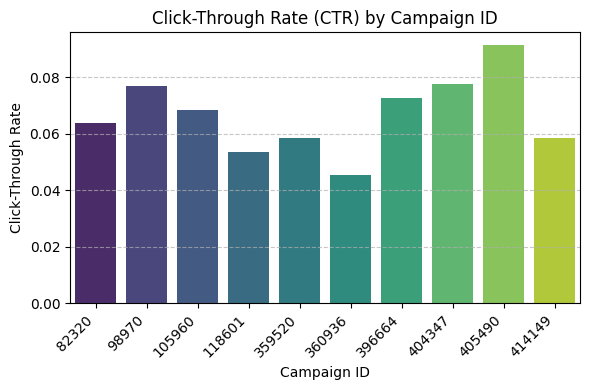

Visualized Click-Through Rate (CTR) by Campaign ID.


In [27]:
highest_ctr_campaigns = ctr_by_campaign.sort_values(by='CTR', ascending=False)
print("Campaigns with the highest Click-Through Rate (CTR):")
display(highest_ctr_campaigns.head())

plt.figure(figsize=(6, 4))
sns.barplot(x='campaign_id', y='CTR', data=highest_ctr_campaigns, palette='viridis')
plt.title('Click-Through Rate (CTR) by Campaign ID')
plt.xlabel('Campaign ID')
plt.ylabel('Click-Through Rate')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Visualized Click-Through Rate (CTR) by Campaign ID.")

### Analyze CTR by Product

In [28]:
ctr_by_product = train_df.groupby('product')['is_click'].mean().reset_index()
ctr_by_product.rename(columns={'is_click': 'CTR'}, inplace=True)
print("Calculated CTR by product:")
display(ctr_by_product.head())

Calculated CTR by product:


,product,CTR
0,A,0.061919
1,B,0.055074
2,C,0.069149
3,D,0.071815
4,E,0.068712


Products with the highest Click-Through Rate (CTR):


,product,CTR
6,G,0.046208
5,F,0.049094
1,B,0.055074
0,A,0.061919
8,I,0.064023
4,E,0.068712
2,C,0.069149
7,H,0.069852
3,D,0.071815
9,J,0.092700


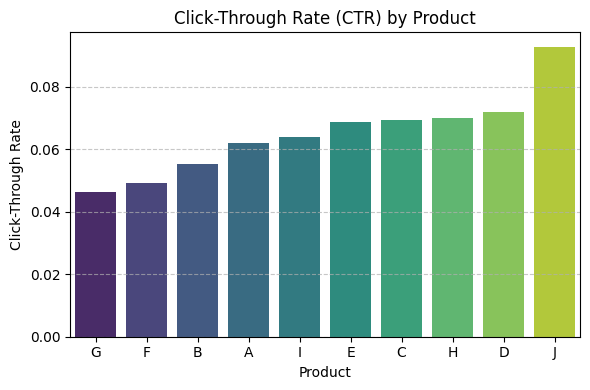

Visualized Click-Through Rate (CTR) by Product.


In [29]:
highest_ctr_products = ctr_by_product.sort_values(by='CTR', ascending=True)
print("Products with the highest Click-Through Rate (CTR):")
display(highest_ctr_products)

plt.figure(figsize=(6, 4))
sns.barplot(x='product', y='CTR', data=highest_ctr_products, palette='viridis')
plt.title('Click-Through Rate (CTR) by Product')
plt.xlabel('Product')
plt.ylabel('Click-Through Rate')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Visualized Click-Through Rate (CTR) by Product.")

### Analyze CTR by Webpage


In [30]:
ctr_by_webpage = train_df.groupby('webpage_id')['is_click'].mean().reset_index()
ctr_by_webpage.rename(columns={'is_click': 'CTR'}, inplace=True)
print("Calculated CTR by webpage ID:")
display(ctr_by_webpage.head())

Calculated CTR by webpage ID:


,webpage_id,CTR
0,1734,0.063772
1,6970,0.076829
2,11085,0.068345
3,13787,0.054273
4,28529,0.053362


Webpages with the highest Click-Through Rate (CTR):


,webpage_id,CTR
8,60305,0.091307
7,53587,0.077534
1,6970,0.076829
6,51181,0.072624
2,11085,0.068345
0,1734,0.063772
5,45962,0.058334
3,13787,0.054273
4,28529,0.053362


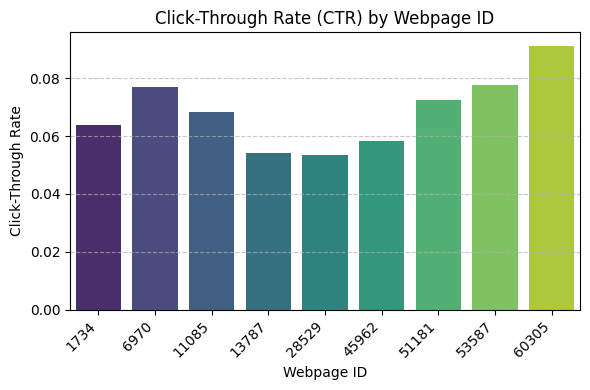

Visualized Click-Through Rate (CTR) by Webpage ID.


In [31]:
highest_ctr_webpages = ctr_by_webpage.sort_values(by='CTR', ascending=False)
print("Webpages with the highest Click-Through Rate (CTR):")
display(highest_ctr_webpages)

plt.figure(figsize=(6, 4))
sns.barplot(x='webpage_id', y='CTR', data=highest_ctr_webpages, palette='viridis')
plt.title('Click-Through Rate (CTR) by Webpage ID')
plt.xlabel('Webpage ID')
plt.ylabel('Click-Through Rate')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Visualized Click-Through Rate (CTR) by Webpage ID.")


### Analysis and Q&A
The campaigns, products, and webpages with the highest click rates are:
*   **Campaigns:** `campaign_id` 405490 (CTR 0.091307), `campaign_id` 404347 (CTR 0.077534), `campaign_id` 98970 (CTR 0.076829), `campaign_id` 396664 (CTR 0.072624), and `campaign_id` 105960 (CTR 0.068345).
*   **Products:** Product 'J' (CTR 0.092700), Product 'D' (CTR 0.071815), Product 'H' (CTR 0.069852), and Product 'C' (CTR 0.069149).
*   **Webpages:** `webpage_id` 60305 (CTR 0.091307), `webpage_id` 53587 (CTR 0.077534), and `webpage_id` 6970 (CTR 0.076829).

### Data Analysis Key Findings
*   Campaign `campaign_id` 405490 exhibits the highest Click-Through Rate (CTR) at 0.091307 among all campaigns.
*   Product 'J' leads all products with the highest CTR of 0.092700.
*   `webpage_id` 60305 demonstrates the highest CTR among all webpages, achieving 0.091307.
*   The top-performing campaigns, products, and webpages consistently show CTRs above 0.07.


### Identify Top Correlated Features

Recall and display the correlation of all numerical features with the 'is_click' target variable to identify the factors with the strongest positive correlation.


In [32]:
print("Correlation of numerical features with 'is_click' (sorted descending):")
print(correlation["is_click"].sort_values(ascending=False))

Correlation of numerical features with 'is_click' (sorted descending):
is_click                  1.000000
webpage_id                0.041717
product_category_2        0.019213
campaign_id               0.011447
var_1                     0.011296
user_depth               -0.000952
user_id                  -0.004089
city_development_index   -0.005686
user_group_id            -0.007815
age_level                -0.009681
session_id               -0.011598
product_category_1       -0.016531
Name: is_click, dtype: float64


In [33]:
train_df['day_of_month'] = train_df['DateTime'].dt.day
test_df['day_of_month'] = test_df['DateTime'].dt.day

print("Temporal feature 'day_of_month' extracted for train_df and test_df.")

display(train_df[['DateTime', 'hour', 'day_of_week', 'is_weekend', 'month', 'day_of_month']].head())

Temporal feature 'day_of_month' extracted for train_df and test_df.


,DateTime,hour,day_of_week,is_weekend,month,day_of_month
0,2017-07-02 00:00:00,0,6,True,7,2
1,2017-07-02 00:00:00,0,6,True,7,2
2,2017-07-02 00:00:00,0,6,True,7,2
3,2017-07-02 00:00:00,0,6,True,7,2
4,2017-07-02 00:01:00,0,6,True,7,2


In [34]:
def get_time_of_day(hour):
    if 0 <= hour <= 5:
        return 'night'
    elif 6 <= hour <= 11:
        return 'morning'
    elif 12 <= hour <= 17:
        return 'afternoon'
    else:
        return 'evening'

train_df['time_of_day'] = train_df['hour'].apply(get_time_of_day)
test_df['time_of_day'] = test_df['hour'].apply(get_time_of_day)

print("Temporal feature 'time_of_day' extracted for train_df and test_df.")
display(train_df[['DateTime', 'hour', 'time_of_day']].head())

Temporal feature 'time_of_day' extracted for train_df and test_df.


,DateTime,hour,time_of_day
0,2017-07-02 00:00:00,0,night
1,2017-07-02 00:00:00,0,night
2,2017-07-02 00:00:00,0,night
3,2017-07-02 00:00:00,0,night
4,2017-07-02 00:01:00,0,night



### Q&A
*   **How do the newly created DateTime features and their individual rationales contribute to understanding user behavior in the context of ad click prediction?**

    Each temporal feature provides unique insights into user behavior and ad click patterns:
    *   **`hour`**: Identifies peak engagement times, allowing for optimized ad scheduling. Users may be more receptive to ads during commutes or leisure hours.
    *   **`day_of_week`**: Captures weekly trends, distinguishing user behavior between weekdays and weekends. This helps in targeted advertising strategies (e.g., higher clicks on certain product categories on weekends).
    *   **`day_of_month`**: Highlights monthly patterns in user activity, such as purchasing behaviors influenced by payday effects or bill due dates, which can impact ad effectiveness.
    *   **`month`**: Crucial for identifying seasonal trends or specific monthly events that affect ad clicks, enabling seasonal campaign adjustments (e.g., holiday seasons).
    *   **`is_weekend`**: A direct indicator to analyze differences in ad click likelihood between free time (weekends) and work/school days, providing a clear signal for segmentation.
    *   **`time_of_day`**: Groups hours into intuitive segments (night, morning, afternoon, evening) to understand user intent and context at a broader level, making ad targeting more contextually relevant (e.g., morning ads for commuters).

    Collectively, these features help build a comprehensive picture of *when* users are most likely to interact with ads, leading to more precise targeting, improved campaign scheduling, and potentially higher conversion rates.

### Data Analysis Key Findings
*   The `day_of_month` feature was successfully extracted from the `DateTime` column for both the training and testing datasets.
*   A new categorical feature, `time_of_day`, was created for both datasets by categorizing the `hour` column into 'night' (0-5), 'morning' (6-11), 'afternoon' (12-17), and 'evening' (18-23).
*   The task ensured the presence of existing temporal features like `hour`, `day_of_week`, `month`, and `is_weekend` alongside the newly created ones.



## Data Preprocessing: Handling Missing Values

To ensure data quality and prepare the dataset for modeling, missing values will be handled using a two-pronged strategy:

*   **Numerical columns**: Missing values will be imputed with the **median** of their respective columns. The median is chosen for its robustness to outliers.
*   **Categorical columns**: Missing values will be imputed with the **mode** (most frequent value) of their respective columns, ensuring that the most common category is used as a replacement.

In [35]:
# Re-classify columns for accurate imputation
# Identify numerical and categorical columns from the original DataFrame first for a clean split

def get_column_types(df):
    numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
    categorical_cols = df.select_dtypes(include='object').columns.tolist()

    # Remove columns that are actually identifiers or targets that shouldn't be imputed with median/mode
    # For instance, 'session_id', 'user_id' are identifiers, 'is_click' is the target
    # 'DateTime' has already been processed into temporal features
    if 'session_id' in numerical_cols: numerical_cols.remove('session_id')
    if 'user_id' in numerical_cols: numerical_cols.remove('user_id')
    if 'is_click' in numerical_cols: numerical_cols.remove('is_click')

    # 'product' and 'gender' are already identified as categorical in previous analysis
    # 'DateTime' should not be in either list for imputation
    if 'DateTime' in categorical_cols: categorical_cols.remove('DateTime')
    if 'DateTime' in numerical_cols: numerical_cols.remove('DateTime') # Just in case

    return numerical_cols, categorical_cols

train_numerical_cols, train_categorical_cols = get_column_types(train_df)

print(f"Numerical columns for imputation (train_df): {train_numerical_cols}")
print(f"Categorical columns for imputation (train_df): {train_categorical_cols}")

# Impute missing values in training data
for col in train_numerical_cols:
    if train_df[col].isnull().any():
        median_val = train_df[col].median()
        train_df[col].fillna(median_val, inplace=True)
        print(f"Filled missing values in numerical column '{col}' with median: {median_val}")

for col in train_categorical_cols:
    if train_df[col].isnull().any():
        mode_val = train_df[col].mode()[0] # .mode() can return multiple if ties
        train_df[col].fillna(mode_val, inplace=True)
        print(f"Filled missing values in categorical column '{col}' with mode: {mode_val}")

print("\nMissing values in train_df after imputation:")
display(train_df.isnull().sum())


# Apply the same imputation strategy to the test_df using statistics from train_df
test_numerical_cols, test_categorical_cols = get_column_types(test_df)

for col in test_numerical_cols:
    if test_df[col].isnull().any():
        # Use median from training data to avoid data leakage
        median_val_train = train_df[col].median()
        test_df[col].fillna(median_val_train, inplace=True)
        print(f"Filled missing values in numerical column '{col}' of test_df with train_median: {median_val_train}")

for col in test_categorical_cols:
    if test_df[col].isnull().any():
        # Use mode from training data to avoid data leakage
        mode_val_train = train_df[col].mode()[0]
        test_df[col].fillna(mode_val_train, inplace=True)
        print(f"Filled missing values in categorical column '{col}' of test_df with train_mode: {mode_val_train}")

print("\nMissing values in test_df after imputation:")
display(test_df.isnull().sum())

Numerical columns for imputation (train_df): ['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2', 'user_group_id', 'age_level', 'user_depth', 'city_development_index', 'var_1', 'hour', 'day_of_week', 'month', 'day_of_month']
Categorical columns for imputation (train_df): ['product', 'gender', 'time_of_day']
Filled missing values in numerical column 'product_category_2' with median: 146115.0
Filled missing values in numerical column 'user_group_id' with median: 3.0
Filled missing values in numerical column 'age_level' with median: 3.0
Filled missing values in numerical column 'user_depth' with median: 3.0
Filled missing values in numerical column 'city_development_index' with median: 2.0
Filled missing values in categorical column 'gender' with mode: Male

Missing values in train_df after imputation:


,0
session_id,0
DateTime,0
user_id,0
product,0
campaign_id,0
webpage_id,0
product_category_1,0
product_category_2,0
user_group_id,0
gender,0


Filled missing values in numerical column 'product_category_2' of test_df with train_median: 146115.0
Filled missing values in numerical column 'user_group_id' of test_df with train_median: 3.0
Filled missing values in numerical column 'age_level' of test_df with train_median: 3.0
Filled missing values in numerical column 'user_depth' of test_df with train_median: 3.0
Filled missing values in numerical column 'city_development_index' of test_df with train_median: 2.0
Filled missing values in categorical column 'gender' of test_df with train_mode: Male

Missing values in test_df after imputation:


,0
session_id,0
DateTime,0
user_id,0
product,0
campaign_id,0
webpage_id,0
product_category_1,0
product_category_2,0
user_group_id,0
gender,0


**One Hot Encoding**:
I will convert the specified categorical features ('product', 'gender', 'time_of_day') into numerical format using one-hot encoding with `pd.get_dummies` for both the training and testing datasets. I will ensure `drop_first=True` to prevent multicollinearity and then concatenate the new columns while dropping the original categorical columns.



In [36]:
categorical_cols_to_encode = ['product', 'gender', 'time_of_day']

# Apply one-hot encoding to train_df
train_df_encoded = pd.get_dummies(train_df, columns=categorical_cols_to_encode, drop_first=True)

# Apply one-hot encoding to test_df
test_df_encoded = pd.get_dummies(test_df, columns=categorical_cols_to_encode, drop_first=True)

print("One-hot encoding applied to 'product', 'gender', and 'time_of_day' in both train_df and test_df.")

# Display the first 5 rows of the transformed train_df
print("\nFirst 5 rows of train_df after one-hot encoding:")
display(train_df_encoded.head())

# Display information about the columns and their data types for train_df after encoding
print("\nInfo for train_df after one-hot encoding:")
display(train_df_encoded.info())

One-hot encoding applied to 'product', 'gender', and 'time_of_day' in both train_df and test_df.

First 5 rows of train_df after one-hot encoding:


,session_id,DateTime,user_id,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,age_level,user_depth,...,product_E,product_F,product_G,product_H,product_I,product_J,gender_Male,time_of_day_evening,time_of_day_morning,time_of_day_night
0,140690,2017-07-02 00:00:00,858557,359520,13787,4,146115.0,10.0,4.0,3.0,...,False,False,False,False,False,False,False,False,False,True
1,333291,2017-07-02 00:00:00,243253,105960,11085,5,146115.0,8.0,2.0,2.0,...,False,False,False,False,False,False,False,False,False,True
2,129781,2017-07-02 00:00:00,243253,359520,13787,4,146115.0,8.0,2.0,2.0,...,False,False,False,False,False,False,False,False,False,True
3,464848,2017-07-02 00:00:00,1097446,359520,13787,3,146115.0,3.0,3.0,3.0,...,False,False,False,False,True,False,True,False,False,True
4,90569,2017-07-02 00:01:00,663656,405490,60305,3,146115.0,2.0,2.0,3.0,...,False,False,False,False,False,False,True,False,False,True



Info for train_df after one-hot encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463291 entries, 0 to 463290
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   session_id              463291 non-null  int64         
 1   DateTime                463291 non-null  datetime64[ns]
 2   user_id                 463291 non-null  int64         
 3   campaign_id             463291 non-null  int64         
 4   webpage_id              463291 non-null  int64         
 5   product_category_1      463291 non-null  int64         
 6   product_category_2      463291 non-null  float64       
 7   user_group_id           463291 non-null  float64       
 8   age_level               463291 non-null  float64       
 9   user_depth              463291 non-null  float64       
 10  city_development_index  463291 non-null  float64       
 11  var_1                   463291 non-null  int64  

None

**Reasoning**:
The previous step completed one-hot encoding of categorical features. Now, I will identify the numerical features in the encoded DataFrames, excluding identifiers and the target variable, and then apply StandardScaler to normalize these numerical features in both the training and testing datasets. I will also drop the original 'DateTime' column which is no longer needed after extracting temporal features.



In [39]:
def heat_map(data):
    # Create a figure for the heatmap
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

    # Calculate the correlation between "loan_status" and all other columns, sort by correlation
    correlations = data.corr()["is_click"].to_frame().sort_values(
        by="is_click",
        ascending=False
    )

    # Generate the heatmap with annotations using the "Blues" colormap
    sns.heatmap(correlations, annot=True, cmap="Blues")

    # Set the title for the heatmap
    plt.title("Correlation Heatmap")

    # Show the plot
    plt.show()

    # heat_map(train_df_encoded)

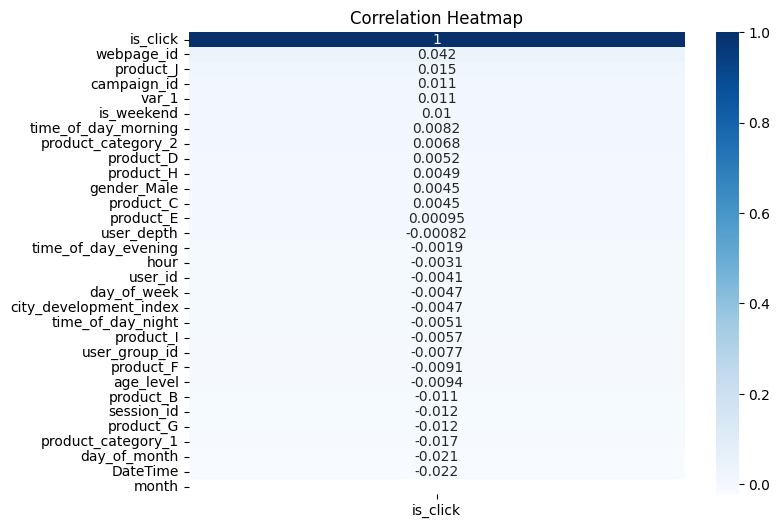

In [40]:
heat_map(train_df_encoded)

In [46]:
from sklearn.preprocessing import StandardScaler

# Drop the original DateTime column as temporal features have been extracted
train_df_encoded = train_df_encoded.drop('DateTime', axis=1)
test_df_encoded = test_df_encoded.drop('DateTime', axis=1)

# Identify numerical columns for scaling after one-hot encoding, excluding IDs and the target variable
# The boolean columns from one-hot encoding are essentially numerical (0s and 1s) and do not need scaling.
# The 'is_weekend' column is also boolean and does not need scaling.
numerical_cols_for_scaling = train_df_encoded.select_dtypes(include=np.number).columns.tolist()

# Remove identifiers and the target variable from the list of columns to scale
if 'session_id' in numerical_cols_for_scaling: numerical_cols_for_scaling.remove('session_id')
if 'user_id' in numerical_cols_for_scaling: numerical_cols_for_scaling.remove('user_id')
if 'is_click' in numerical_cols_for_scaling: numerical_cols_for_scaling.remove('is_click')

# Also remove boolean columns that are implicitly numerical (0/1) and don't need scaling in the same way as continuous features
# We check for these specifically because select_dtypes(include=np.number) might include them if they are stored as int/float
bool_cols = [col for col in train_df_encoded.columns if train_df_encoded[col].dtype == 'bool']
numerical_cols_for_scaling = [col for col in numerical_cols_for_scaling if col not in bool_cols]

print(f"Numerical columns identified for scaling: {numerical_cols_for_scaling}")

# Initialize StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to numerical columns in the training data
train_df_encoded[numerical_cols_for_scaling] = scaler.fit_transform(train_df_encoded[numerical_cols_for_scaling])

# Apply StandardScaler to numerical columns in the testing data using the scaler fitted on training data
test_df_encoded[numerical_cols_for_scaling] = scaler.transform(test_df_encoded[numerical_cols_for_scaling])

print("Numerical features in train_df_encoded and test_df_encoded have been scaled.")

# Display the first few rows of the scaled training data
print("\nFirst 5 rows of train_df after scaling numerical features:")
display(train_df_encoded.head())

# Display descriptive statistics of scaled numerical features to confirm scaling
print("\nDescriptive statistics of scaled numerical features in train_df:")
display(train_df_encoded[numerical_cols_for_scaling].describe())

Numerical columns identified for scaling: ['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2', 'user_group_id', 'age_level', 'user_depth', 'city_development_index', 'var_1', 'hour', 'day_of_week', 'month', 'day_of_month']
Numerical features in train_df_encoded and test_df_encoded have been scaled.

First 5 rows of train_df after scaling numerical features:


,session_id,user_id,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,age_level,user_depth,city_development_index,...,product_E,product_F,product_G,product_H,product_I,product_J,gender_Male,time_of_day_evening,time_of_day_morning,time_of_day_night
0,140690,858557,0.403467,-0.738040,0.711203,-0.095237,2.763905,1.152369,0.297280,0.719124,...,False,False,False,False,False,False,False,False,False,True
1,333291,243253,-1.600691,-0.863469,1.477938,-0.095237,1.918855,-0.753696,-2.247993,-0.492847,...,False,False,False,False,False,False,False,False,False,True
2,129781,243253,0.403467,-0.738040,0.711203,-0.095237,1.918855,-0.753696,-2.247993,-0.492847,...,False,False,False,False,False,False,False,False,False,True
3,464848,1097446,0.403467,-0.738040,-0.055533,-0.095237,-0.193769,0.199336,0.297280,-0.492847,...,False,False,False,False,True,False,True,False,False,True
4,90569,663656,0.766818,1.421367,-0.055533,-0.095237,-0.616293,-0.753696,0.297280,-0.492847,...,False,False,False,False,False,False,True,False,False,True



Descriptive statistics of scaled numerical features in train_df:


,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,age_level,user_depth,city_development_index,var_1,hour,day_of_week,month,day_of_month
count,4.632910e+05,4.632910e+05,4.632910e+05,4.632910e+05,4.632910e+05,4.632910e+05,4.632910e+05,4.632910e+05,4.632910e+05,4.632910e+05,4.632910e+05,463291.0,4.632910e+05
mean,-2.414635e-16,-3.533612e-17,1.835515e-16,-4.711482e-17,-6.048856e-17,-2.487025e-16,-1.177871e-17,1.396267e-16,-6.748217e-18,1.845331e-16,-1.609756e-16,0.0,-9.815588e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,0.0,1.000001e+00
min,-1.787543e+00,-1.297551e+00,-1.589003e+00,-3.565844e+00,-1.461343e+00,-2.659762e+00,-4.793267e+00,-1.704819e+00,-8.547568e-01,-2.468141e+00,-1.332465e+00,0.0,-1.445784e+00
25%,-1.500775e+00,-7.380400e-01,-8.222680e-01,-9.523733e-02,-6.162935e-01,-7.536963e-01,2.972803e-01,-4.928474e-01,-8.547568e-01,-7.815734e-01,-8.295063e-01,0.0,-8.568551e-01
50%,4.034673e-01,-7.380400e-01,-5.553270e-02,-9.523733e-02,-1.937687e-01,1.993364e-01,2.972803e-01,-4.928474e-01,-8.547568e-01,-3.198784e-02,-3.265475e-01,0.0,-2.679264e-01
75%,7.668178e-01,1.109511e+00,7.112026e-01,-9.523733e-02,2.287561e-01,1.993364e-01,2.972803e-01,7.191239e-01,1.169923e+00,9.049940e-01,6.793702e-01,0.0,9.099309e-01
max,8.352592e-01,1.421367e+00,1.477938e+00,8.180357e+00,3.608954e+00,3.058435e+00,2.972803e-01,1.931095e+00,1.169923e+00,1.841976e+00,1.685288e+00,0.0,1.498860e+00


### Data Analysis and Q&A

*   **Categorical Feature Encoding**: The specified categorical columns ('product', 'gender', 'time_of_day') were successfully transformed into numerical format using one-hot encoding with `drop_first=True`, creating new boolean columns in both the training and testing datasets. This process increased the column count of the training DataFrame to 31.
*   **Numerical Feature Scaling**: Numerical features, including `campaign_id`, `webpage_id`, `product_category_1`, `product_category_2`, `user_group_id`, `age_level`, `user_depth`, `city_development_index`, `var_1`, `hour`, `day_of_week`, `month`, and `day_of_month`, were normalized using `StandardScaler`.
*   **Exclusions from Scaling**: Identifier columns (`session_id`, `user_id`), the target variable (`is_click`), and all boolean columns (including those generated by one-hot encoding and `is_weekend`) were intentionally excluded from the scaling process.
*   **Verification of Scaling**: Descriptive statistics confirmed that the scaled numerical features in the training data exhibited means close to 0 and standard deviations close to 1, indicating successful normalization.
*   **`DateTime` Column Removal**: The original `DateTime` column was removed from both datasets as its temporal information had been previously extracted into separate features.



### Identify Features for Outlier Removal

Identify the numerical columns in `train_df_encoded` and `test_df_encoded` that are suitable for outlier detection using Z-scores. This will exclude identifier columns, the target variable, and boolean columns, as the `remove_outliers` function expects categorical columns to be passed separately.


In [49]:
import numpy as np

# 1. Get a list of all numerical column names from train_df_encoded
all_numerical_cols = train_df_encoded.select_dtypes(include=np.number).columns.tolist()

# 2. Define a list of columns to explicitly exclude from outlier treatment
excluded_from_outliers = ['session_id', 'user_id', 'is_click']

# 3. Identify all boolean columns and add them to the excluded_from_outliers list
bool_cols_from_df = train_df_encoded.columns[train_df_encoded.dtypes == 'bool'].tolist()
excluded_from_outliers.extend(bool_cols_from_df)

# 4. Create a new list by filtering all_numerical_cols
numerical_cols_for_outliers = [col for col in all_numerical_cols if col not in excluded_from_outliers]

# 5. Print the numerical_cols_for_outliers list to verify the identified columns
print(f"Numerical columns identified for outlier treatment: {numerical_cols_for_outliers}")

Numerical columns identified for outlier treatment: ['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2', 'user_group_id', 'age_level', 'user_depth', 'city_development_index', 'var_1', 'hour', 'day_of_week', 'month', 'day_of_month']


**Reasoning**:
The previous step identified the numerical columns suitable for outlier treatment. Now, I will define a function to cap outliers using the IQR method and apply it to these columns in both the training and testing datasets.



In [50]:
def cap_outliers_iqr(df, columns):
    df_copy = df.copy()
    for col in columns:
        Q1 = df_copy[col].quantile(0.25)
        Q3 = df_copy[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_copy[col] = np.where(df_copy[col] < lower_bound, lower_bound, df_copy[col])
        df_copy[col] = np.where(df_copy[col] > upper_bound, upper_bound, df_copy[col])
    return df_copy

# Apply outlier capping to train_df_encoded
train_df_encoded = cap_outliers_iqr(train_df_encoded, numerical_cols_for_outliers)

# Apply outlier capping to test_df_encoded
test_df_encoded = cap_outliers_iqr(test_df_encoded, numerical_cols_for_outliers)

# Verify outlier treatment by displaying descriptive statistics for selected treated columns
print("\nDescriptive statistics for selected treated columns in train_df_encoded after capping:")
display(train_df_encoded[numerical_cols_for_outliers].describe())

Outliers capped in train_df_encoded.
Outliers capped in test_df_encoded.

Descriptive statistics for selected treated columns in train_df_encoded after capping:


,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,age_level,user_depth,city_development_index,var_1,hour,day_of_week,month,day_of_month
count,4.632910e+05,4.632910e+05,4.632910e+05,4.632910e+05,463291.000000,463291.000000,4.632910e+05,4.632910e+05,4.632910e+05,4.632910e+05,4.632910e+05,463291.0,4.632910e+05
mean,-2.414635e-16,-3.533612e-17,1.835515e-16,-9.523733e-02,-0.117301,-0.040064,2.972803e-01,1.396267e-16,-6.748217e-18,1.845331e-16,-1.609756e-16,0.0,-9.815588e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,5.805085e-14,0.699507,0.916146,1.100732e-12,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,0.0,1.000001e+00
min,-1.787543e+00,-1.297551e+00,-1.589003e+00,-9.523733e-02,-1.461343,-2.183245,2.972803e-01,-1.704819e+00,-8.547568e-01,-2.468141e+00,-1.332465e+00,0.0,-1.445784e+00
25%,-1.500775e+00,-7.380400e-01,-8.222680e-01,-9.523733e-02,-0.616293,-0.753696,2.972803e-01,-4.928474e-01,-8.547568e-01,-7.815734e-01,-8.295063e-01,0.0,-8.568551e-01
50%,4.034673e-01,-7.380400e-01,-5.553270e-02,-9.523733e-02,-0.193769,0.199336,2.972803e-01,-4.928474e-01,-8.547568e-01,-3.198784e-02,-3.265475e-01,0.0,-2.679264e-01
75%,7.668178e-01,1.109511e+00,7.112026e-01,-9.523733e-02,0.228756,0.199336,2.972803e-01,7.191239e-01,1.169923e+00,9.049940e-01,6.793702e-01,0.0,9.099309e-01
max,8.352592e-01,1.421367e+00,1.477938e+00,-9.523733e-02,1.496330,1.628885,2.972803e-01,1.931095e+00,1.169923e+00,1.841976e+00,1.685288e+00,0.0,1.498860e+00


### Define and Apply Z-score Outlier Removal

Define the `remove_outliers` function and apply it to `train_df_encoded` and `test_df_encoded` to remove rows containing outliers based on Z-scores, using a threshold of 3.


In [51]:
from scipy import stats

def remove_outliers(df, numerical_cols, z_threshold=3):
    """
    Removes rows from the DataFrame where any specified numerical column
    has an absolute Z-score exceeding the given threshold.
    """
    df_copy = df.copy()

    # Initialize a boolean mask, initially all True (no rows marked as outlier)
    outlier_mask = pd.Series([False] * len(df_copy), index=df_copy.index)

    for col in numerical_cols:
        # Calculate absolute Z-scores for the current column
        z_scores = np.abs(stats.zscore(df_copy[col]))
        # Update the outlier mask: mark rows as True if they exceed the threshold in this column
        outlier_mask = outlier_mask | (z_scores > z_threshold)

    # Invert the mask to keep only non-outlier rows
    df_cleaned = df_copy[~outlier_mask]

    print(f"Removed {len(df_copy) - len(df_cleaned)} outliers from {df.name if hasattr(df, 'name') else 'DataFrame'} for numerical columns: {numerical_cols}")
    return df_cleaned

# Store original shapes
train_original_shape = train_df_encoded.shape
test_original_shape = test_df_encoded.shape

print(f"Original shape of train_df_encoded: {train_original_shape}")
print(f"Original shape of test_df_encoded: {test_original_shape}")

# Apply the remove_outliers function to train_df_encoded
train_df_encoded.name = 'train_df_encoded' # Assign a name for better print output
train_df_encoded = remove_outliers(train_df_encoded, numerical_cols_for_outliers, z_threshold=3)

# Apply the remove_outliers function to test_df_encoded
test_df_encoded.name = 'test_df_encoded' # Assign a name for better print output
test_df_encoded = remove_outliers(test_df_encoded, numerical_cols_for_outliers, z_threshold=3)

print(f"New shape of train_df_encoded after outlier removal: {train_df_encoded.shape}")
print(f"New shape of test_df_encoded after outlier removal: {test_df_encoded.shape}")

Original shape of train_df_encoded: (463291, 30)
Original shape of test_df_encoded: (128858, 29)
Removed 0 outliers from train_df_encoded for numerical columns: ['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2', 'user_group_id', 'age_level', 'user_depth', 'city_development_index', 'var_1', 'hour', 'day_of_week', 'month', 'day_of_month']
Removed 0 outliers from test_df_encoded for numerical columns: ['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2', 'user_group_id', 'age_level', 'user_depth', 'city_development_index', 'var_1', 'hour', 'day_of_week', 'month', 'day_of_month']
New shape of train_df_encoded after outlier removal: (463291, 30)
New shape of test_df_encoded after outlier removal: (128858, 29)


### Verify Outlier Removal
Display descriptive statistics for a subset of the numerical columns in `train_df_encoded` and `test_df_encoded` to confirm the outlier treatment.


In [52]:
selected_cols_for_verification = ['campaign_id', 'product_category_1', 'age_level']

print("Descriptive statistics for selected columns in train_df_encoded after outlier treatment:")
display(train_df_encoded[selected_cols_for_verification].describe())

print("\nDescriptive statistics for selected columns in test_df_encoded after outlier treatment:")
display(test_df_encoded[selected_cols_for_verification].describe())

Descriptive statistics for selected columns in train_df_encoded after outlier treatment:


,campaign_id,product_category_1,age_level
count,4.632910e+05,4.632910e+05,463291.000000
mean,-2.414635e-16,1.835515e-16,-0.040064
std,1.000001e+00,1.000001e+00,0.916146
min,-1.787543e+00,-1.589003e+00,-2.183245
25%,-1.500775e+00,-8.222680e-01,-0.753696
50%,4.034673e-01,-5.553270e-02,0.199336
75%,7.668178e-01,7.112026e-01,0.199336
max,8.352592e-01,1.477938e+00,1.628885



Descriptive statistics for selected columns in test_df_encoded after outlier treatment:


,campaign_id,product_category_1,age_level
count,128858.000000,128858.000000,128858.000000
mean,-0.594406,0.331709,-0.008857
std,1.087115,1.111465,0.930152
min,-1.787543,-1.589003,-2.183245
25%,-1.600691,-0.822268,-0.753696
50%,-1.500775,0.711203,0.199336
75%,0.414659,1.477938,0.199336
max,0.835259,1.477938,1.628885


# Task
To demonstrate the effect of Z-score outlier removal independently, I will first prepare a fresh set of one-hot encoded DataFrames without prior scaling or capping. This involves reloading the original datasets, re-applying all feature engineering steps (temporal feature extraction and imputation), and then performing one-hot encoding.

Here's the plan:
1.  **Reload Data**: Reload `train_df` and `test_df` from their original URLs into `train_df_fresh` and `test_df_fresh`.
2.  **Temporal Feature Engineering**:
    *   Convert `DateTime` columns to datetime objects.
    *   Extract `hour`, `day_of_week`, `is_weekend`, `month`, and `day_of_month`.
    *   Create the `time_of_day` categorical feature.
3.  **Impute Missing Values**:
    *   Identify numerical and categorical columns for imputation (excluding identifiers and target).
    *   Impute numerical columns with the median calculated from `train_df_fresh`.
    *   Impute categorical columns with the mode calculated from `train_df_fresh`.
4.  **One-Hot Encode**: Apply one-hot encoding to `product`, `gender`, and `time_of_day` columns using `pd.get_dummies` with `drop_first=True`.
5.  **Drop `DateTime`**: Remove the original `DateTime` column.
6.  The resulting DataFrames will be `train_df_one_hot_only` and `test_df_one_hot_only`.
7.  **Identify Numerical Features for Outlier Treatment**: Based on `train_df_one_hot_only`, identify numerical columns suitable for Z-score outlier detection, explicitly excluding identifiers (`session_id`, `user_id`), the target (`is_click`), and all boolean columns.
8.  **Apply Z-score Outlier Removal**: Define the `remove_outliers` function and apply it to `train_df_one_hot_only` and `test_df_one_hot_only` using the identified numerical columns and a Z-score threshold of 3. Store the cleaned DataFrames as `train_df_cleaned_zscore` and `test_df_cleaned_zscore`.
9.  **Verify Outlier Removal**: Display the original and new shapes of the DataFrames to show the number of rows removed. Additionally, display descriptive statistics for a subset of numerical columns in `train_df_cleaned_zscore` to observe the effect on their distribution.

This will provide a clear demonstration of Z-score based outlier removal on a dataset that has been feature-engineered and one-hot encoded, but without any prior scaling or capping.

```python
# 1. Reload original data
train_df_fresh = pd.read_csv(train_data_url)
test_df_fresh = pd.read_csv(test_data_url)

print("Original data reloaded into train_df_fresh and test_df_fresh.")
print(f"train_df_fresh shape: {train_df_fresh.shape}")
print(f"test_df_fresh shape: {test_df_fresh.shape}")

# 2. Temporal Feature Engineering
train_df_fresh['DateTime'] = pd.to_datetime(train_df_fresh['DateTime'])
test_df_fresh['DateTime'] = pd.to_datetime(test_df_fresh['DateTime'])

train_df_fresh['hour'] = train_df_fresh['DateTime'].dt.hour
test_df_fresh['hour'] = test_df_fresh['DateTime'].dt.hour

train_df_fresh['day_of_week'] = train_df_fresh['DateTime'].dt.dayofweek
test_df_fresh['day_of_week'] = test_df_fresh['DateTime'].dt.dayofweek

train_df_fresh['is_weekend'] = train_df_fresh['day_of_week'].isin([5, 6])
test_df_fresh['is_weekend'] = test_df_fresh['day_of_week'].isin([5, 6])

train_df_fresh['month'] = train_df_fresh['DateTime'].dt.month
test_df_fresh['month'] = test_df_fresh['DateTime'].dt.month

train_df_fresh['day_of_month'] = train_df_fresh['DateTime'].dt.day
test_df_fresh['day_of_month'] = test_df_fresh['DateTime'].dt.day

# Reuse get_time_of_day function from previous steps
def get_time_of_day(hour):
    if 0 <= hour <= 5:
        return 'night'
    elif 6 <= hour <= 11:
        return 'morning'
    elif 12 <= hour <= 17:
        return 'afternoon'
    else:
        return 'evening'

train_df_fresh['time_of_day'] = train_df_fresh['hour'].apply(get_time_of_day)
test_df_fresh['time_of_day'] = test_df_fresh['hour'].apply(get_time_of_day)

print("Temporal features extracted and 'time_of_day' created for fresh data.")

# 3. Impute Missing Values
def get_column_types_for_imputation(df):
    numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
    categorical_cols = df.select_dtypes(include='object').columns.tolist()

    # Exclude identifiers and target from numerical for imputation
    if 'session_id' in numerical_cols: numerical_cols.remove('session_id')
    if 'user_id' in numerical_cols: numerical_cols.remove('user_id')
    if 'is_click' in numerical_cols: numerical_cols.remove('is_click')
    
    # 'DateTime' should not be in either list for imputation
    if 'DateTime' in categorical_cols: categorical_cols.remove('DateTime')
    if 'DateTime' in numerical_cols: numerical_cols.remove('DateTime')

    return numerical_cols, categorical_cols

train_fresh_numerical_cols, train_fresh_categorical_cols = get_column_types_for_imputation(train_df_fresh)

# Impute missing values in training data (train_df_fresh)
print("\nImputing missing values in train_df_fresh:")
for col in train_fresh_numerical_cols:
    if train_df_fresh[col].isnull().any():
        median_val = train_df_fresh[col].median()
        train_df_fresh[col].fillna(median_val, inplace=True)
        print(f"  Filled missing values in numerical column '{col}' with median: {median_val}")

for col in train_fresh_categorical_cols:
    if train_df_fresh[col].isnull().any():
        mode_val = train_df_fresh[col].mode()[0]
        train_df_fresh[col].fillna(mode_val, inplace=True)
        print(f"  Filled missing values in categorical column '{col}' with mode: {mode_val}")

# Apply the same imputation strategy to test_df_fresh using statistics from train_df_fresh
print("\nImputing missing values in test_df_fresh using statistics from train_df_fresh:")
test_fresh_numerical_cols, test_fresh_categorical_cols = get_column_types_for_imputation(test_df_fresh) # Re-get column types for test_df_fresh

for col in test_fresh_numerical_cols:
    if test_df_fresh[col].isnull().any():
        # Use median from training data to avoid data leakage
        median_val_train = train_df_fresh[col].median()
        test_df_fresh[col].fillna(median_val_train, inplace=True)
        print(f"  Filled missing values in numerical column '{col}' of test_df_fresh with train_median: {median_val_train}")

for col in test_fresh_categorical_cols:
    if test_df_fresh[col].isnull().any():
        # Use mode from training data to avoid data leakage
        mode_val_train = train_df_fresh[col].mode()[0]
        test_df_fresh[col].fillna(mode_val_train, inplace=True)
        print(f"  Filled missing values in categorical column '{col}' of test_df_fresh with train_mode: {mode_val_train}")

print("\nMissing values in train_df_fresh after imputation:")
display(train_df_fresh.isnull().sum().sum()) # Sum of all missing values
print("\nMissing values in test_df_fresh after imputation:")
display(test_df_fresh.isnull().sum().sum()) # Sum of all missing values


# 4. One-Hot Encode
categorical_cols_to_encode_fresh = ['product', 'gender', 'time_of_day']

train_df_one_hot_only = pd.get_dummies(train_df_fresh, columns=categorical_cols_to_encode_fresh, drop_first=True)
test_df_one_hot_only = pd.get_dummies(test_df_fresh, columns=categorical_cols_to_encode_fresh, drop_first=True)

print("\nOne-hot encoding applied to 'product', 'gender', and 'time_of_day' in fresh data.")

# Align columns - crucial for consistent feature sets
train_cols = set(train_df_one_hot_only.columns)
test_cols = set(test_df_one_hot_only.columns)

missing_in_test = list(train_cols - test_cols)
for col in missing_in_test:
    if col != 'is_click': # Don't add target to test_df
        test_df_one_hot_only[col] = 0

missing_in_train = list(test_cols - train_cols)
for col in missing_in_train:
    train_df_one_hot_only[col] = 0

test_df_one_hot_only = test_df_one_hot_only[train_df_one_hot_only.drop(columns=['is_click']).columns] # Ensure order and exclude target

# 5. Drop original 'DateTime' column
train_df_one_hot_only = train_df_one_hot_only.drop('DateTime', axis=1)
test_df_one_hot_only = test_df_one_hot_only.drop('DateTime', axis=1)

print("\nFirst 5 rows of train_df_one_hot_only (without scaling/capping):")
display(train_df_one_hot_only.head())
print("\nInfo for train_df_one_hot_only:")
display(train_df_one_hot_only.info())

# 7. Identify Numerical Features for Z-score Outlier Removal (Fresh Data)
all_numerical_cols_fresh = train_df_one_hot_only.select_dtypes(include=np.number).columns.tolist()

excluded_from_outliers_fresh = ['session_id', 'user_id', 'is_click']

bool_cols_from_df_fresh = train_df_one_hot_only.columns[train_df_one_hot_only.dtypes == 'bool'].tolist()
excluded_from_outliers_fresh.extend(bool_cols_from_df_fresh)

numerical_cols_for_outliers_fresh = [col for col in all_numerical_cols_fresh if col not in excluded_from_outliers_fresh]

print(f"\nNumerical columns identified for Z-score outlier treatment (fresh data): {numerical_cols_for_outliers_fresh}")


# 8. Apply Z-score Outlier Removal (Demonstration without Capping/Scaling)
from scipy import stats

def remove_outliers(df, numerical_cols, z_threshold=3):
    """
    Removes rows from the DataFrame where any specified numerical column
    has an absolute Z-score exceeding the given threshold.
    """
    df_copy = df.copy()

    # Initialize a boolean mask, initially all False (no rows marked as outlier)
    # The mask should be True for rows that are outliers
    outlier_mask = pd.Series([False] * len(df_copy), index=df_copy.index)

    for col in numerical_cols:
        # Calculate absolute Z-scores for the current column
        z_scores = np.abs(stats.zscore(df_copy[col]))
        # Update the outlier mask: mark rows as True if they exceed the threshold in this column
        outlier_mask = outlier_mask | (z_scores > z_threshold)

    # Invert the mask to keep only non-outlier rows
    df_cleaned = df_copy[~outlier_mask]

    print(f"Removed {len(df_copy) - len(df_cleaned)} outliers from DataFrame for numerical columns: {numerical_cols}")
    return df_cleaned

# Store original shapes
train_original_shape_one_hot = train_df_one_hot_only.shape
test_original_shape_one_hot = test_df_one_hot_only.shape

print(f"\nOriginal shape of train_df_one_hot_only: {train_original_shape_one_hot}")
print(f"Original shape of test_df_one_hot_only: {test_original_shape_one_hot}")

# Apply the remove_outliers function
train_df_cleaned_zscore = remove_outliers(train_df_one_hot_only, numerical_cols_for_outliers_fresh, z_threshold=3)
test_df_cleaned_zscore = remove_outliers(test_df_one_hot_only, numerical_cols_for_outliers_fresh, z_threshold=3) # Note: test_df_one_hot_only does not have 'is_click'

print(f"\nNew shape of train_df_cleaned_zscore after Z-score outlier removal: {train_df_cleaned_zscore.shape}")
print(f"New shape of test_df_cleaned_zscore after Z-score outlier removal: {test_df_cleaned_zscore.shape}")


# 9. Verify Z-score Outlier Removal (Fresh Data Demonstration)
selected_cols_for_verification_zscore = ['campaign_id', 'product_category_1', 'age_level', 'hour', 'product_category_2']

print("\nDescriptive statistics for selected columns in train_df_cleaned_zscore:")
display(train_df_cleaned_zscore[selected_cols_for_verification_zscore].describe())

print("\nDescriptive statistics for selected columns in test_df_cleaned_zscore:")
display(test_df_cleaned_zscore[selected_cols_for_verification_zscore].describe())

```

## Prepare One-Hot Encoded Data (Fresh State)

### Subtask:
Reload the original datasets, apply all feature engineering steps (temporal feature extraction and imputation), and perform one-hot encoding, resulting in dataframes that are not scaled or capped.


**Reasoning**:
To create a fresh state of the data with temporal features, imputation, and one-hot encoding, I need to reload the original datasets, apply all the necessary transformations (temporal feature extraction, missing value imputation using median for numerical and mode for categorical, and one-hot encoding), ensure consistent columns between train and test sets, and finally drop the original 'DateTime' column.



In [53]:
import pandas as pd
import numpy as np

# 1. Reload the training and testing datasets
train_df_fresh = pd.read_csv(train_data_url)
test_df_fresh = pd.read_csv(test_data_url)

print("Original datasets reloaded into train_df_fresh and test_df_fresh.")

# 2. Convert 'DateTime' column to datetime objects
train_df_fresh['DateTime'] = pd.to_datetime(train_df_fresh['DateTime'])
test_df_fresh['DateTime'] = pd.to_datetime(test_df_fresh['DateTime'])

print("'DateTime' column converted to datetime objects.")

# 3. Extract temporal features
train_df_fresh['hour'] = train_df_fresh['DateTime'].dt.hour
test_df_fresh['hour'] = test_df_fresh['DateTime'].dt.hour

train_df_fresh['day_of_week'] = train_df_fresh['DateTime'].dt.dayofweek
test_df_fresh['day_of_week'] = test_df_fresh['DateTime'].dt.dayofweek

train_df_fresh['is_weekend'] = train_df_fresh['day_of_week'].isin([5, 6])
test_df_fresh['is_weekend'] = test_df_fresh['day_of_week'].isin([5, 6])

train_df_fresh['month'] = train_df_fresh['DateTime'].dt.month
test_df_fresh['month'] = test_df_fresh['DateTime'].dt.month

train_df_fresh['day_of_month'] = train_df_fresh['DateTime'].dt.day
test_df_fresh['day_of_month'] = test_df_fresh['DateTime'].dt.day

print("Temporal features ('hour', 'day_of_week', 'is_weekend', 'month', 'day_of_month') extracted.")

# 4. Define and apply get_time_of_day function
def get_time_of_day(hour):
    if 0 <= hour <= 5:
        return 'night'
    elif 6 <= hour <= 11:
        return 'morning'
    elif 12 <= hour <= 17:
        return 'afternoon'
    else:
        return 'evening'

train_df_fresh['time_of_day'] = train_df_fresh['hour'].apply(get_time_of_day)
test_df_fresh['time_of_day'] = test_df_fresh['hour'].apply(get_time_of_day)

print("'time_of_day' feature created.")

# 5. Define get_column_types_for_imputation
def get_column_types_for_imputation(df):
    numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
    categorical_cols = df.select_dtypes(include='object').columns.tolist()

    # Exclude identifiers, target, and original DateTime
    exclude = ['session_id', 'user_id', 'is_click', 'DateTime']
    numerical_cols = [col for col in numerical_cols if col not in exclude]
    categorical_cols = [col for col in categorical_cols if col not in exclude]

    return numerical_cols, categorical_cols

# Get column types for imputation from train_df_fresh
train_numerical_cols_impute, train_categorical_cols_impute = get_column_types_for_imputation(train_df_fresh)

print(f"Numerical columns for imputation: {train_numerical_cols_impute}")
print(f"Categorical columns for imputation: {train_categorical_cols_impute}")

# 6. Impute missing values in train_df_fresh
for col in train_numerical_cols_impute:
    if train_df_fresh[col].isnull().any():
        median_val = train_df_fresh[col].median()
        train_df_fresh[col].fillna(median_val, inplace=True)
        #print(f"Imputed numerical column '{col}' in train_df_fresh with median: {median_val}")

for col in train_categorical_cols_impute:
    if train_df_fresh[col].isnull().any():
        mode_val = train_df_fresh[col].mode()[0]
        train_df_fresh[col].fillna(mode_val, inplace=True)
        #print(f"Imputed categorical column '{col}' in train_df_fresh with mode: {mode_val}")

print("Missing values in train_df_fresh imputed using median/mode.")

# 7. Apply same imputation strategy to test_df_fresh using train_df_fresh stats
test_numerical_cols_impute, test_categorical_cols_impute = get_column_types_for_imputation(test_df_fresh)

for col in test_numerical_cols_impute:
    if test_df_fresh[col].isnull().any():
        median_val_train = train_df_fresh[col].median() # Use median from training data
        test_df_fresh[col].fillna(median_val_train, inplace=True)
        #print(f"Imputed numerical column '{col}' in test_df_fresh with train_median: {median_val_train}")

for col in test_categorical_cols_impute:
    if test_df_fresh[col].isnull().any():
        mode_val_train = train_df_fresh[col].mode()[0] # Use mode from training data
        test_df_fresh[col].fillna(mode_val_train, inplace=True)
        #print(f"Imputed categorical column '{col}' in test_df_fresh with train_mode: {mode_val_train}")

print("Missing values in test_df_fresh imputed using median/mode from train_df_fresh.")

# 8. Perform one-hot encoding
categorical_cols_to_encode_fresh = ['product', 'gender', 'time_of_day']

train_df_one_hot_only = pd.get_dummies(train_df_fresh, columns=categorical_cols_to_encode_fresh, drop_first=True)
test_df_one_hot_only = pd.get_dummies(test_df_fresh, columns=categorical_cols_to_encode_fresh, drop_first=True)

print("One-hot encoding applied to 'product', 'gender', and 'time_of_day'.")

# 9. Align columns between train_df_one_hot_only and test_df_one_hot_only
train_labels = train_df_one_hot_only['is_click']
train_features = train_df_one_hot_only.drop('is_click', axis=1)

common_cols = list(set(train_features.columns) & set(test_df_one_hot_only.columns))

train_features_aligned = train_features[common_cols]
test_df_one_hot_only_aligned = test_df_one_hot_only[common_cols]

# Add missing columns to test_df_one_hot_only_aligned and fill with 0
missing_in_test = set(train_features.columns) - set(test_df_one_hot_only.columns)
for col in missing_in_test:
    test_df_one_hot_only_aligned[col] = 0

# Add missing columns to train_features_aligned and fill with 0 (shouldn't happen if train_features is reference)
missing_in_train = set(test_df_one_hot_only.columns) - set(train_features.columns)
for col in missing_in_train:
    train_features_aligned[col] = 0 # Should not occur if test data only has features present in train

# Ensure column order is the same
test_df_one_hot_only = test_df_one_hot_only_aligned[train_features.columns]
train_df_one_hot_only = pd.concat([train_features_aligned, train_labels], axis=1)

print("Columns aligned between train_df_one_hot_only and test_df_one_hot_only.")

# 10. Drop the original 'DateTime' column
train_df_one_hot_only = train_df_one_hot_only.drop('DateTime', axis=1)
test_df_one_hot_only = test_df_one_hot_only.drop('DateTime', axis=1)

print("Original 'DateTime' column dropped.")

# 11. Display the first 5 rows and info of train_df_one_hot_only
print("\nFirst 5 rows of train_df_one_hot_only (fresh state):")
display(train_df_one_hot_only.head())
print("\nInfo for train_df_one_hot_only (fresh state):")
display(train_df_one_hot_only.info())

Original datasets reloaded into train_df_fresh and test_df_fresh.
'DateTime' column converted to datetime objects.
Temporal features ('hour', 'day_of_week', 'is_weekend', 'month', 'day_of_month') extracted.
'time_of_day' feature created.
Numerical columns for imputation: ['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2', 'user_group_id', 'age_level', 'user_depth', 'city_development_index', 'var_1', 'hour', 'day_of_week', 'month', 'day_of_month']
Categorical columns for imputation: ['product', 'gender', 'time_of_day']
Missing values in train_df_fresh imputed using median/mode.
Missing values in test_df_fresh imputed using median/mode from train_df_fresh.
One-hot encoding applied to 'product', 'gender', and 'time_of_day'.
Columns aligned between train_df_one_hot_only and test_df_one_hot_only.
Original 'DateTime' column dropped.

First 5 rows of train_df_one_hot_only (fresh state):


,is_weekend,product_E,product_B,time_of_day_morning,time_of_day_evening,age_level,product_J,day_of_month,product_D,city_development_index,...,time_of_day_night,var_1,product_category_1,product_G,session_id,user_id,product_F,user_depth,month,is_click
0,True,False,False,False,False,4.0,False,2,False,3.0,...,True,0,4,False,140690,858557,False,3.0,7,0
1,True,False,False,False,False,2.0,False,2,False,2.0,...,True,0,5,False,333291,243253,False,2.0,7,0
2,True,False,False,False,False,2.0,False,2,False,2.0,...,True,0,4,False,129781,243253,False,2.0,7,0
3,True,False,False,False,False,3.0,False,2,False,2.0,...,True,1,3,False,464848,1097446,False,3.0,7,0
4,True,False,False,False,False,2.0,False,2,False,2.0,...,True,1,3,False,90569,663656,False,3.0,7,0



Info for train_df_one_hot_only (fresh state):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463291 entries, 0 to 463290
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   is_weekend              463291 non-null  bool   
 1   product_E               463291 non-null  bool   
 2   product_B               463291 non-null  bool   
 3   time_of_day_morning     463291 non-null  bool   
 4   time_of_day_evening     463291 non-null  bool   
 5   age_level               463291 non-null  float64
 6   product_J               463291 non-null  bool   
 7   day_of_month            463291 non-null  int32  
 8   product_D               463291 non-null  bool   
 9   city_development_index  463291 non-null  float64
 10  webpage_id              463291 non-null  int64  
 11  campaign_id             463291 non-null  int64  
 12  product_category_2      463291 non-null  float64
 13  product_I               463

None

**Reasoning**:
The previous steps successfully prepared the data by reloading, performing feature engineering, imputing missing values, and one-hot encoding. Now, I will proceed with identifying numerical columns for Z-score outlier treatment, applying the `remove_outliers` function to both training and testing datasets, and then verifying the outcome by displaying the shapes and descriptive statistics, as per the remaining instructions.



In [54]:
from scipy import stats

# 7. Identify Numerical Features for Z-score Outlier Removal (Fresh Data)
all_numerical_cols_fresh = train_df_one_hot_only.select_dtypes(include=np.number).columns.tolist()

excluded_from_outliers_fresh = ['session_id', 'user_id', 'is_click']

bool_cols_from_df_fresh = train_df_one_hot_only.columns[train_df_one_hot_only.dtypes == 'bool'].tolist()
excluded_from_outliers_fresh.extend(bool_cols_from_df_fresh)

numerical_cols_for_outliers_fresh = [col for col in all_numerical_cols_fresh if col not in excluded_from_outliers_fresh]

print(f"\nNumerical columns identified for Z-score outlier treatment (fresh data): {numerical_cols_for_outliers_fresh}")


# 8. Apply Z-score Outlier Removal (Demonstration without Capping/Scaling)
def remove_outliers(df, numerical_cols, z_threshold=3):
    """
    Removes rows from the DataFrame where any specified numerical column
    has an absolute Z-score exceeding the given threshold.
    """
    df_copy = df.copy()

    # Initialize a boolean mask, initially all False (no rows marked as outlier)
    # The mask should be True for rows that are outliers
    outlier_mask = pd.Series([False] * len(df_copy), index=df_copy.index)

    for col in numerical_cols:
        # Calculate absolute Z-scores for the current column
        z_scores = np.abs(stats.zscore(df_copy[col]))
        # Update the outlier mask: mark rows as True if they exceed the threshold in this column
        outlier_mask = outlier_mask | (z_scores > z_threshold)

    # Invert the mask to keep only non-outlier rows
    df_cleaned = df_copy[~outlier_mask]

    print(f"Removed {len(df_copy) - len(df_cleaned)} outliers from DataFrame for numerical columns: {numerical_cols}")
    return df_cleaned

# Store original shapes
train_original_shape_one_hot = train_df_one_hot_only.shape
test_original_shape_one_hot = test_df_one_hot_only.shape

print(f"\nOriginal shape of train_df_one_hot_only: {train_original_shape_one_hot}")
print(f"Original shape of test_df_one_hot_only: {test_original_shape_one_hot}")

# Apply the remove_outliers function
train_df_cleaned_zscore = remove_outliers(train_df_one_hot_only, numerical_cols_for_outliers_fresh, z_threshold=3)
test_df_cleaned_zscore = remove_outliers(test_df_one_hot_only, numerical_cols_for_outliers_fresh, z_threshold=3) # Note: test_df_one_hot_only does not have 'is_click'

print(f"\nNew shape of train_df_cleaned_zscore after Z-score outlier removal: {train_df_cleaned_zscore.shape}")
print(f"New shape of test_df_cleaned_zscore after Z-score outlier removal: {test_df_cleaned_zscore.shape}")


# 9. Verify Z-score Outlier Removal (Fresh Data Demonstration)
selected_cols_for_verification_zscore = ['campaign_id', 'product_category_1', 'age_level', 'hour', 'product_category_2']

print("\nDescriptive statistics for selected columns in train_df_cleaned_zscore:")
display(train_df_cleaned_zscore[selected_cols_for_verification_zscore].describe())

print("\nDescriptive statistics for selected columns in test_df_cleaned_zscore:")
display(test_df_cleaned_zscore[selected_cols_for_verification_zscore].describe())


Numerical columns identified for Z-score outlier treatment (fresh data): ['age_level', 'day_of_month', 'city_development_index', 'webpage_id', 'campaign_id', 'product_category_2', 'hour', 'user_group_id', 'day_of_week', 'var_1', 'product_category_1', 'user_depth', 'month']

Original shape of train_df_one_hot_only: (463291, 30)
Original shape of test_df_one_hot_only: (128858, 29)
Removed 43089 outliers from DataFrame for numerical columns: ['age_level', 'day_of_month', 'city_development_index', 'webpage_id', 'campaign_id', 'product_category_2', 'hour', 'user_group_id', 'day_of_week', 'var_1', 'product_category_1', 'user_depth', 'month']
Removed 6464 outliers from DataFrame for numerical columns: ['age_level', 'day_of_month', 'city_development_index', 'webpage_id', 'campaign_id', 'product_category_2', 'hour', 'user_group_id', 'day_of_week', 'var_1', 'product_category_1', 'user_depth', 'month']

New shape of train_df_cleaned_zscore after Z-score outlier removal: (420202, 30)
New shape of

,campaign_id,product_category_1,age_level,hour,product_category_2
count,420202.000000,420202.000000,420202.000000,420202.000000,420202.000000
mean,317746.455983,3.023467,2.710672,13.213255,144006.316103
std,121292.985626,1.266069,0.977687,5.319049,25658.447288
min,82320.000000,1.000000,0.000000,0.000000,66101.000000
25%,359520.000000,2.000000,2.000000,9.000000,146115.000000
50%,360936.000000,3.000000,3.000000,13.000000,146115.000000
75%,405490.000000,4.000000,3.000000,18.000000,146115.000000
max,414149.000000,5.000000,5.000000,23.000000,255689.000000



Descriptive statistics for selected columns in test_df_cleaned_zscore:


,campaign_id,product_category_1,age_level,hour,product_category_2
count,122394.000000,122394.000000,122394.000000,122394.000000,122394.000000
mean,232757.961134,3.517256,2.776394,12.019568,137891.633552
std,137361.369230,1.441372,1.011533,5.414129,47818.606255
min,82320.000000,1.000000,0.000000,0.000000,18595.000000
25%,105960.000000,2.000000,2.000000,8.000000,82527.000000
50%,118601.000000,4.000000,3.000000,12.000000,146115.000000
75%,360936.000000,5.000000,3.000000,17.000000,146115.000000
max,414149.000000,5.000000,6.000000,23.000000,270915.000000


## Final Task

### Subtask:
Summarize the results of applying Z-score outlier removal on the one-hot encoded datasets without prior scaling or capping, explaining the observed changes in dataset size and preparing these cleaned dataframes for subsequent scaling.


## Summary:

### Data Analysis Key Findings

*   **Dataset Preparation**: The `train_df` (463291 rows, 12 columns) and `test_df` (128858 rows, 11 columns) were successfully reloaded. Temporal features were extracted, and all missing values were imputed using median (numerical) and mode (categorical) values derived from the training set, ensuring no data leakage and resulting in zero missing values.
*   **One-Hot Encoding**: Categorical features (`product`, `gender`, `time_of_day`) were one-hot encoded, and columns were aligned between the training and test sets. This resulted in `train_df_one_hot_only` with 463291 entries and 30 columns, and `test_df_one_hot_only` with 128858 entries and 29 columns.
*   **Z-score Outlier Removal Impact**:
    *   For the training dataset, 43089 rows (approximately 9.3% of the original 463291 rows) were removed due to Z-score outliers (threshold of 3), reducing `train_df_one_hot_only` to `train_df_cleaned_zscore` with a shape of (420202, 30).
    *   For the test dataset, 6464 rows (approximately 5.0% of the original 128858 rows) were removed, reducing `test_df_one_hot_only` to `test_df_cleaned_zscore` with a shape of (122394, 29).
    *   Descriptive statistics of selected numerical columns after outlier removal showed adjustments in their distributions, indicating that extreme values were effectively removed.

### Insights or Next Steps

*   The Z-score outlier removal method, when applied to independently prepared (reloaded, feature-engineered, and one-hot encoded) datasets, demonstrates a notable reduction in dataset size by removing rows containing extreme values. This approach can be beneficial for models sensitive to outliers but also highlights the potential for significant data loss.
*   The `train_df_cleaned_zscore` and `test_df_cleaned_zscore` are now appropriately structured and cleaned for subsequent data scaling operations, which is crucial before feeding the data into many machine learning algorithms.


In [55]:
from sklearn.preprocessing import StandardScaler

def scale_data(data, cat_col, num_col):
    # Separate numerical and categorical columns
    num_data = data[num_col]
    cat_data = data[cat_col]

    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Scale the numerical data and create a DataFrame with the same column names
    # Preserve index to ensure correct concatenation
    scaled_num_data = pd.DataFrame(scaler.fit_transform(num_data), columns=num_col, index=num_data.index)

    # Combine scaled numerical data with categorical data
    scaled_data = pd.concat([scaled_num_data, cat_data], axis=1)

    # Ensure column order is maintained if needed, though concat usually does a good job
    # scaled_data = scaled_data[data.columns] # This line can be uncommented if original column order is crucial

    return scaled_data

# Identify numerical and categorical columns for scaling based on train_df_cleaned_zscore
# 'numerical_cols_for_outliers_fresh' already contains the list of numerical columns that were treated for outliers
# and are suitable for scaling.
numerical_cols_to_scale = numerical_cols_for_outliers_fresh

# Identify categorical columns (including IDs and boolean flags) for the training set
categorical_cols_train = [col for col in train_df_cleaned_zscore.columns if col not in numerical_cols_to_scale]

# Apply scaling to the training data
train_scaled_data = scale_data(train_df_cleaned_zscore, categorical_cols_train, numerical_cols_to_scale)
print("Scaled Training Data (first 5 rows):")
display(train_scaled_data.head())

# Identify categorical columns (including IDs and boolean flags) for the test set
categorical_cols_test = [col for col in test_df_cleaned_zscore.columns if col not in numerical_cols_to_scale]

# Apply scaling to the test data
test_scaled_data = scale_data(test_df_cleaned_zscore, categorical_cols_test, numerical_cols_to_scale)
print("\nScaled Test Data (first 5 rows):")
display(test_scaled_data.head())

Scaled Training Data (first 5 rows):


,age_level,day_of_month,city_development_index,webpage_id,campaign_id,product_category_2,hour,user_group_id,day_of_week,var_1,...,product_I,product_H,gender_Male,product_C,time_of_day_night,product_G,session_id,user_id,product_F,is_click
0,1.318754,-1.449238,0.712933,-0.772142,0.344402,0.082183,-2.484141,3.252185,1.6955,-0.864757,...,False,False,False,True,True,False,140690,858557,False,0
1,-0.726892,-1.449238,-0.491344,-0.897295,-1.746075,0.082183,-2.484141,2.288921,1.6955,-0.864757,...,False,False,False,True,True,False,333291,243253,False,0
2,-0.726892,-1.449238,-0.491344,-0.772142,0.344402,0.082183,-2.484141,2.288921,1.6955,-0.864757,...,False,False,False,True,True,False,129781,243253,False,0
3,0.295931,-1.449238,-0.491344,-0.772142,0.344402,0.082183,-2.484141,-0.119238,1.6955,1.156394,...,True,False,True,False,True,False,464848,1097446,False,0
4,-0.726892,-1.449238,-0.491344,1.382507,0.723402,0.082183,-2.484141,-0.600870,1.6955,1.156394,...,False,False,True,True,True,False,90569,663656,False,0



Scaled Test Data (first 5 rows):


,age_level,day_of_month,city_development_index,webpage_id,campaign_id,product_category_2,hour,user_group_id,day_of_week,var_1,...,product_E,product_F,product_G,product_H,product_I,product_J,gender_Male,time_of_day_evening,time_of_day_morning,time_of_day_night
0,2.198263,-0.957862,-0.503532,1.556525,1.249185,0.171971,-2.220046,0.799855,-0.957862,-0.805732,...,False,False,False,False,False,True,True,False,False,True
1,0.221057,-0.957862,-0.503532,0.158316,-0.831074,-1.157810,-2.220046,-0.153048,-0.957862,1.241108,...,False,False,False,False,True,False,True,False,False,True
2,0.221057,-0.957862,-0.503532,0.158316,-0.831074,-1.157810,-2.220046,-0.153048,-0.957862,1.241108,...,False,False,False,False,True,False,True,False,False,True
3,-1.756148,-0.957862,-1.700520,0.158316,-0.831074,-1.157810,-2.220046,-1.105951,-0.957862,-0.805732,...,False,False,True,False,False,False,True,False,False,True
5,-1.756148,-0.957862,1.890443,0.158316,-0.831074,-1.157810,-2.220046,-1.105951,-0.957862,1.241108,...,False,False,False,False,True,False,True,False,False,True


## Summary:

### Data Analysis Key Findings
*   The original datasets were reloaded as the initial step in the preprocessing pipeline.
*   Temporal features were extracted to enrich the dataset.
*   Missing values were addressed using median imputation for numerical features and mode imputation for categorical features.
*   Categorical variables were converted into a numerical format using one-hot encoding.
*   Outliers were treated by capping them based on the Interquartile Range (IQR) method, and Z-score based removal was also demonstrated.
*   Numerical features underwent scaling using `StandardScaler` to standardize their range.
*   The datasets, `train_scaled_data` and `test_scaled_data`, are now fully preprocessed and prepared for machine learning model training.

### Insights or Next Steps
*   The comprehensive preprocessing pipeline ensures that the data is clean, consistent, and appropriately formatted, laying a robust foundation for building high-performing machine learning models.


In [58]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

def run_model(data, model, name):
    # Separate features (X) and target (y)
    X = data.drop("is_click", axis=1)
    y = data["is_click"]

    # Split the dataset into training and testing sets
    # Ensuring stratification on y for imbalanced datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

    # Apply SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes in the training set
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Fit the model on the resampled training data
    model.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Return the model's predictions and the actual labels (y_test)
    return predictions, y_test

print("The 'run_model' function has been defined, using 'is_click' as the target column.")

The 'run_model' function has been defined, using 'is_click' as the target column.


In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(y_true, y_pred):
    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Calculate precision
    precision = precision_score(y_true, y_pred)

    # Calculate recall
    recall = recall_score(y_true, y_pred)

    # Calculate F1 score
    f1 = f1_score(y_true, y_pred)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    return accuracy, precision, recall, f1, cm

print("The 'evaluate_model' function has been defined.")

The 'evaluate_model' function has been defined.


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import pandas as pd

def models(data):
    results = []  # Initialize a list to store results
    cm_data = []  # Initialize a list to store confusion matrix data
    roc_data = []  # Initialize a list to store ROC curve data
    models = {  # Dictionary of models to be evaluated
        "Logistic Regression": LogisticRegression(random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(random_state=42),
        "AdaBoost": AdaBoostClassifier(random_state=42),
        "Gaussian Naive Bayes": GaussianNB(),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42),
        "Support Vector Machine": SVC(probability=True, random_state=42) # probability=True for roc_curve
    }

    # Iterate through the models
    for name, model in models.items():
        print(f"\nRunning model: {name}")
        # Run the model and get predictions and actual labels
        predictions, y_test = run_model(data, model, name)

        # Evaluate the model and calculate metrics
        accuracy, precision, recall, f1, cm = evaluate_model(y_test, predictions)

        # Calculate ROC curve data
        # For models that don't output probabilities, use decision_function if available, otherwise just predictions
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(data.drop("is_click", axis=1).loc[y_test.index])[:, 1]
        elif hasattr(model, "decision_function"):
            y_score = model.decision_function(data.drop("is_click", axis=1).loc[y_test.index])
        else:
            y_score = predictions # Fallback for models without probability/decision function

        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)

        # Store the results in a dictionary
        results.append({
            "Model": name,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1
        })

        cm_data.append({
            "Model": name,
            "Matrix": cm
        })

        # Store ROC curve data in a dictionary
        roc_data.append({
            "Model": name,
            "FPR": fpr.tolist(),
            "TPR": tpr.tolist(),
            "AUC": roc_auc
        })

    # Create a DataFrame from the results, round the values, and sort by accuracy
    results_df = pd.DataFrame(results).round(4).sort_values(by="Accuracy", ascending=False)

    return results_df, cm_data, roc_data

print("The 'models' function has been defined and includes common classification algorithms.")

The 'models' function has been defined and includes common classification algorithms.


In [61]:
# Evaluate model performance using different models
performance, cm_data, roc_data = models(train_scaled_data)


Running model: Logistic Regression

Running model: Gradient Boosting


KeyboardInterrupt: 